In [2]:
{
  "terminal.integrated.gpuAcceleration": "on"
}

{'terminal.integrated.gpuAcceleration': 'on'}

In [3]:
import os
import cv2
import pickle
import numpy as np
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def close_window_os():
    cv2.destroyAllWindows()
    for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)


In [6]:
image = cv2.imread('hieu.jpg', 1)
image = cv2.resize(image, (200, 200))

facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_coordinates = facecascade.detectMultiScale(gray, 1.3, 4)

for (a, b, w, h) in face_coordinates:
    cv2.rectangle(image, (a, b), (a+w, b+h), (255, 0, 0), 2)
    
#Question 1:
print("Face detection's coordinate: ", face_coordinates)
cv2.imshow('frames', image)
cv2.waitKey(0)
close_window_os()

Face detection's coordinate:  [[69 48 77 77]]


In [7]:
face_data = []
i = 0

camera = cv2.VideoCapture(0)

facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

name = input('Enter your name --> ')
ret = True

while(ret):
    ret, frame = camera.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        face_coordinates = facecascade.detectMultiScale(gray, 1.3, 4)

        for (a, b, w, h) in face_coordinates:
            faces = frame[b:b+h, a:a+w, :]
            resized_faces = cv2.resize(faces, (200, 200))
            
            if i % 10 == 0 and len(face_data) < 10:
                face_data.append(resized_faces)
            cv2.rectangle(frame, (a, b), (a+w, b+h), (255, 0, 0), 2)
        i += 1

        cv2.imshow('frames', frame)

        if cv2.waitKey(1) == 27:
            break
    else:
        print('error')
        break

cv2.destroyAllWindows()
camera.release()
close_window_os()

face_data = np.array(face_data)
face_data = face_data.reshape(10, -1)

if 'names.pkl' not in os.listdir('D:/Python/IOT/Face/FaceResnet/dataset'):
    names = [name]*10
    with open('D:/Python/IOT/Face/FaceResnet/dataset/names.pkl', 'wb') as file:
        pickle.dump(names, file)
else:
    with open('D:/Python/IOT/Face/FaceResnet/dataset/names.pkl', 'rb') as file:
        names = pickle.load(file)
    
    names = names + [name]*10
    with open('D:/Python/IOT/Face/FaceResnet/dataset/names.pkl', 'wb') as file:
        pickle.dump(names, file)

if 'faces.pkl' not in os.listdir('D:/Python/IOT/Face/FaceResnet/dataset/'):
    with open('D:/Python/IOT/Face/FaceResnet/dataset/faces.pkl', 'wb') as w:
        pickle.dump(face_data, w)
else:
    with open('D:/Python/IOT/Face/FaceResnet/dataset/faces.pkl', 'rb') as w:
        faces = pickle.load(w)

    faces = np.append(faces, face_data, axis=0)
    with open('D:/Python/IOT/Face/FaceResnet/dataset/faces.pkl', 'wb') as w:
        pickle.dump(faces, w)

In [88]:
print(names)
print(faces)

['son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu', 'hieu']
[[165 149 173 ... 255 251 255]
 [172 163 183 ... 248 254 255]
 [174 170 192 ... 245 253 255]
 ...
 [ 20  20  21 ... 151 140 180]
 [ 26  25  24 ... 194 184 201]
 [ 39  35  33 ... 225 216 222]]


In [5]:
with open(os.path.join('D:/Python/IOT/Face/FaceResnet/dataset/faces.pkl'), 'wb') as w:
    pickle.dump([], w)

with open(os.path.join('D:/Python/IOT/Face/FaceResnet/dataset/names.pkl'), 'wb') as file:
    pickle.dump([], file)

print("Dữ liệu trong face_data.pkl và names.pkl đã xóa.")

Dữ liệu trong face_data.pkl và names.pkl đã xóa.


In [ ]:
with open('D:/Python/IOT/Face/FaceResnet/dataset/names.pkl', 'rb') as file:
    labels = pickle.load(file)
with open('D:/Python/IOT/Face/FaceResnet/dataset/faces.pkl', 'rb') as w:
    data = pickle.load(w)

imagePaths = glob.glob('D:/Python/IOT/Face/FaceResnet/dataset/*/*.jpg')
IMAGE_SIZE = 200
CLASSES = 62
BATCH_SIZE = 16
EPOCHS = 50

for imagePath in imagePaths:
    label= os.path.basename(os.path.dirname(imagePath))
    head, tail = os.path.split(imagePath)
    image = tf.io.read_file(imagePath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)/255.0
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
        
data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = tf.keras.utils.to_categorical(labels)

(train_X, test_X, train_y, test_y) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

NameError: name 'pickle' is not defined

In [ ]:
augment = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")

# defining model-resnet50
resnet_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False
)

x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
predictions = tf.keras.layers.Dense(
    CLASSES,
    activation='softmax'
)(x)

resnet50_model = tf.keras.models.Model(
    inputs= resnet_model.input, 
    outputs=predictions
)

resnet50_model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),  
    metrics=['accuracy']
)

resnet50_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 24,584,706 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [24]:
! git clone https://github.com/bckenstler/CLR.git


fatal: destination path 'CLR' already exists and is not an empty directory.


In [75]:
def triangular_lr(epoch):
    base_lr = 1e-5
    max_lr = 1e-3
    step_size = 2000
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * max(0, (1 - x))
    return lr

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(triangular_lr)

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-5)

callbacks = [learning_rate_reduction, lr_scheduler]

expected_size = IMAGE_SIZE * IMAGE_SIZE * 3

train_X = train_X.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
test_X = test_X.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)

train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

print(f"Train X shape: {train_X.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Test y shape: {test_y.shape}")

steps_per_epoch = int(np.ceil(len(train_X) / BATCH_SIZE))
validation_steps = int(np.ceil(len(test_X) / BATCH_SIZE))

history_resnet50 = resnet50_model.fit(
    augment.flow(train_X, train_y, batch_size=BATCH_SIZE),
    steps_per_epoch=steps_per_epoch,
    validation_data=(test_X, test_y),
    validation_steps=validation_steps,
    epochs=EPOCHS,
    callbacks=callbacks
)

Train X shape: (24, 200, 200, 3)
Train y shape: (24, 2)
Test X shape: (6, 200, 200, 3)
Test y shape: (6, 2)


d:\python\AI\envs\aio2024_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.6667 - loss: 0.6166 - val_accuracy: 0.3333 - val_loss: 1.0080 - learning_rate: 1.0000e-05
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5694 - loss: 0.6363 - val_accuracy: 0.3333 - val_loss: 1.0017 - learning_rate: 1.0495e-05
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6250 - loss: 0.5686 - val_accuracy: 0.3333 - val_loss: 0.9989 - learning_rate: 1.0990e-05
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8472 - loss: 0.5863 - val_accuracy: 0.3333 - val_loss: 1.0014 - learning_rate: 1.1485e-05
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7292 - loss: 0.5918
Epoch 5: ReduceLROnPlateau reducing learning rate to 1e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7222 - loss: 0.5880 - val_accuracy: 0.3333 - val_loss: 1.0073 - learning_rate: 1.0000e-05
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.7500 - loss: 0.5719 - val_accuracy: 0.3333 - val_los

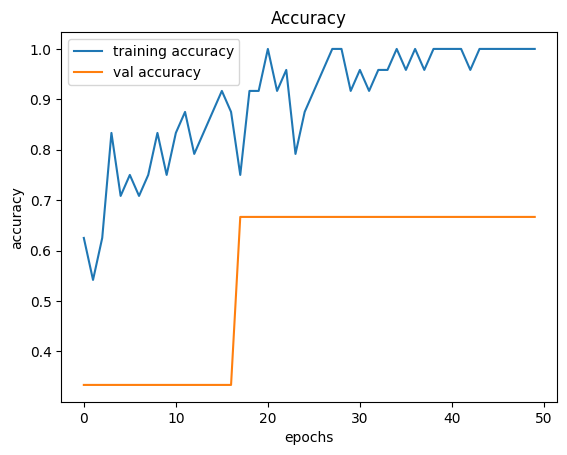

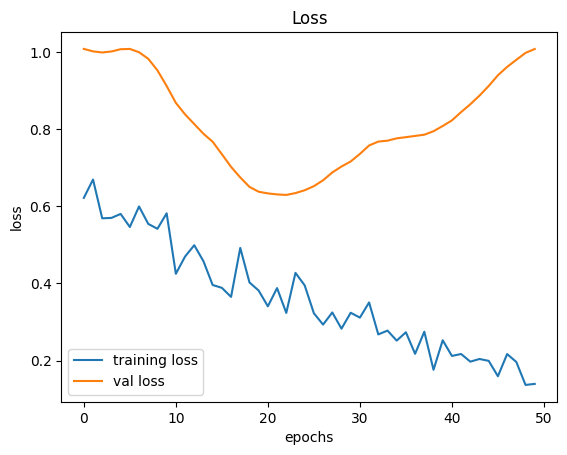

In [ ]:
plt.figure(0)
plt.plot(history_resnet50.history['accuracy'], label='training accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history_resnet50.history['loss'], label='training loss')
plt.plot(history_resnet50.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [78]:
resnet50_model.save_weights('model_weights.weights.h5')

In [69]:
print(labels)

['quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'quyet', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung', 'son tung']


In [ ]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

resnet50_model.load_weights('model_weights.weights.h5')

camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_coordinates = facecascade.detectMultiScale(gray, 1.3, 5)

        for (a, b, w, h) in face_coordinates
            fc = frame[b:b + h, a:a + w, :]
            resized_fc = cv2.resize(fc, (200, 200))  
            normalized_fc = resized_fc.astype('float32') / 255.0
            reshaped_fc = np.expand_dims(normalized_fc, axis=0) 

            predictions = resnet50_model.predict(reshaped_fc)
            class_index = np.argmax(predictions, axis=1)[0]
            class_label = labels[class_index]  

            # Hiển thị kết quả
            cv2.putText(frame, str(class_label), (a, b-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
            cv2.rectangle(frame, (a, b), (a + w, b + h), (0, 0, 255), 2)

        cv2.imshow('livetime face recognition', frame)
        if cv2.waitKey(1) == 27: 
            break
    else:
        print("error")
        break

cv2.destroyAllWindows()
camera.release()
close_window_os()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━

In [80]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
